# Fault Diagnosis Toolbox in Python -- a development notebook

Erik Frisk<br>
<frisk@isy.liu.se><br>
Department of Electrical Engineering<br>
Linköping University<br>
Sweden

## Basic Python imports

In [1]:
##%matplotlib inline
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import sys
import numpy as np
import csv
import scipy.sparse as sp

## Fault Diagnosis Toolbox import

In [2]:
sys.path.append("faultdiagnosistoolbox/build/lib.macosx-10.6-x86_64-2.7/")
import faultdiagnosistoolbox as fdt

In [3]:
reload(fdt)
dir(fdt)

['CSCDict',
 'DMResult',
 'DiagnosisModel',
 'DiffConstraint',
 'EqBlock',
 'GetDMParts',
 'PlotDM',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 'dmperm',
 'np',
 'plt',
 'sa',
 'sp',
 'sprank']

## Some basic helper functions

In [4]:
def ReadMatrixCSV(fileName):
    with open(fileName, 'rt') as csvfile:
        matReader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        size = matReader.next() # Assume first line contains size information
        X=np.zeros((int(size[0]),int(size[1])),dtype='float64');
        for edge in matReader:
            X[int(edge[0]),int(edge[1])] = float(edge[2])
        return X

## Defining a diagnosis models -- structural information

Simple structure model from the DAMADICS benchmark problem

In [5]:
modelDef={}

modelDef['type'] = 'Symbolic'
modelDef['x']= ['p1','p2','p3','q0','q1','q2','q3','dp1','dp2','dp3']
modelDef['f'] = ['fV1','fV2','fV3','fT1','fT2','fT3']
modelDef['z'] = ['y1','y2','y3']
modelDef['parameters'] = ['Rv1', 'Rv2', 'Rv3', 'CT1', 'CT2', 'CT3']
modelDef['rels'] = [
    ['q1', 'p1', 'p2', 'fV1'],
    ['q2', 'p2', 'p3', 'fV2'],
    ['q3', 'p3', 'fV3'],
    ['dp1','q0','q1','fT1'],
    ['dp2','q1','q2','fT2'],
    ['dp3','q2','q3','fT3'],
    ['y1','p1'],
    ['y2','q2'],
    ['y3','q0'],
    fdt.DiffConstraint('dp1','p1'),
    fdt.DiffConstraint('dp2','p2'),
    fdt.DiffConstraint('dp3','p3')]

model = fdt.DiagnosisModel( modelDef );
model.name = 'Three tank system';

In [6]:
print model.x
print model.X
print model.e

['p1', 'p2', 'p3', 'q0', 'q1', 'q2', 'q3', 'dp1', 'dp2', 'dp3']
[[ 1.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 2.  0.  0.  0.  0.  0.  0.  3.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  3.  0.]
 [ 0.  0.  2.  0.  0.  0.  0.  0.  0.  3.]]
['e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12']


<IPython.core.display.Javascript object>


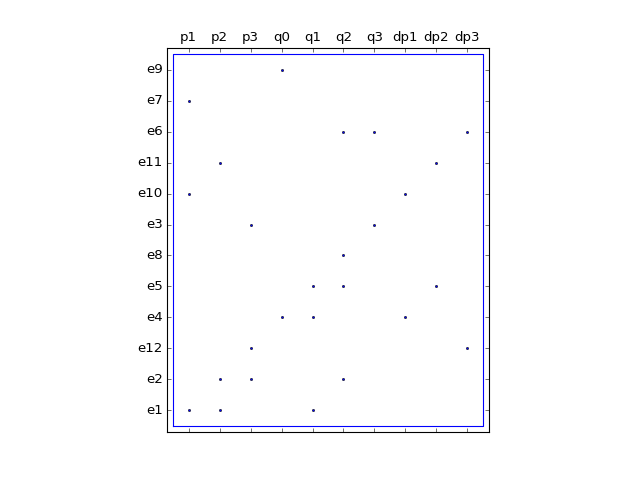

In [7]:
plt.figure(1)
model.PlotDM()
plt.show()

## Test some fundamental structural analysis operations

In [48]:
X=ReadMatrixCSV('Xengine.txt')
dm=fdt.GetDMParts(X)
print fdt.sprank(X)
print len(dm.M0)

278
6


In [ ]:
plt.figure(2)
fdt.PlotDM(X)
plt.xticks(np.arange(0,X.shape[0]),[np.str(i) for i in dm.colp])
plt.yticks(np.arange(0,X.shape[1]),[np.str(i) for i in dm.rowp])
plt.show()

## Debug

In [22]:
import faultdiagnosistoolbox.dmperm as dmperm
modelDef={}

modelDef['type'] = 'Symbolic'
modelDef['x']= ['p1','p2','p3','q0','q1','q2','q3','dp1','dp2','dp3']
modelDef['f'] = ['fV1','fV2','fV3','fT1','fT2','fT3']
modelDef['z'] = ['y1','y2','y3']
modelDef['parameters'] = ['Rv1', 'Rv2', 'Rv3', 'CT1', 'CT2', 'CT3']
modelDef['rels'] = [
    ['q1', 'p1', 'p2', 'fV1'],
    ['q2', 'p2', 'p3', 'fV2'],
    ['q3', 'p3', 'fV3'],
    ['dp1','q0','q1','fT1'],
    ['dp2','q1','q2','fT2'],
    ['dp3','q2','q3','fT3'],
    ['y1','p1'],
    ['y2','q2'],
    ['y3','q0'],
    DiffConstraint('dp1','p1'),
    DiffConstraint('dp2','p2'),
    DiffConstraint('dp3','p3')]

model = DiagnosisModel( modelDef );
model.name = 'Three tank system';

In [23]:
model.IsPSO([1,2,3])

False

In [ ]:
dm = fdt.GetDMParts(model.X)
plt.figure(10)
model.PlotDM()
plt.show()

In [233]:
def PSODecomposition(X):
    if not IsPSO(X):
        print "PSO Decomposition for PSO structures only, exiting..."
        return;

    n = X.shape[0]
    m = X.shape[1]

    delrows=np.arange(0,n)
    eqclass = []
    trivclass = []
    Mi = np.array([]);

    while len(delrows)>0:
        temprow = np.array([x for x in np.arange(0,n) if not x == delrows[0]])
        dm = dmperm.GetDMParts(X[temprow,:]);

        if len(dm.M0vars)>0:
            ec_row = np.sort(np.append(temprow[dm.M0eqs], delrows[0]))
            ec = dmperm.EqBlock(ec_row,dm.M0vars)
            eqclass.append(ec)
            Mi.append(ec.col)
            delrows = [x for x in delrows if x not in ec.row]
        else:
            trivclass.append(delrows[0])
            delrows = delrows[1:len(delrows)]
    print Mi
    X0 = np.sort([x for x in np.arange(0,m) if not x in Mi])
    if len(X0)==0:
        X0=[]
    res = {}
    res['eqclass'] = eqclass
    res['trivclass'] = trivclass
    res['X0'] = X0

    p = [];
    q = [];
    
    for ec in eqclass:
        p.append(ec.row)
        q.append(ec.col)
    p.append(trivclass)
    q.append(X0)
    
    res['p'] = p
    res['q'] = q

In [230]:
foo = np.arange(0,3)
bar = np.arange(3,6)
np.concatenate((foo,bar))

array([0, 1, 2, 3, 4, 5])

In [234]:
PSODecomposition(model.X)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [145]:
dm=dmperm.GetDMParts(model.X)

In [192]:
import faultdiagnosistoolbox.dmperm as dmperm
reload(dmperm);

In [193]:
dm=dmperm.GetDMParts(X)
print dm.M0eqs
print dm.M0vars

[ 82  83  84  85  86  87  88 120 121 122 123 124 131 132 133 134 135 136
 137 138 139 140]
[ 82  83  84  85  86  87  88  89 121 122 123 124 125 131 132 133 134 135
 136 137 138 139]
